In [102]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup

In [133]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN', 'AMD', 'NVDA', 'GOOG', 'UBER', 'META'] #A list consisting of all stocks can be made

# Scraping the Finviz site with financial information about USA stocks.

In [134]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

In [135]:
import matplotlib.pyplot as plt

news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, 'html')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table
    #break
    
parsed_data = []

for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title = row.a.get_text()
        date_data = row.td.text.split() #This was fixed from(' ') to just ()

        
        if len(date_data) == 1:
            time = date_data[0]
            
        else:
            date = date_data[0]
            time = date_data[1]
            


        parsed_data.append([ticker, date, time, title])



In [136]:
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])


vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)

#print(df.head())
#print(df.tail())

In [137]:
from datetime import datetime
df['date'] = df['date'].replace('Today', datetime.today().strftime('%b-%d-%y'))

#print(df.head())

In [138]:
df['date'] = pd.to_datetime(df.date).dt.date

#print(df.head())
#print(df.tail())

plt.figure(figsize=(10,8))

C:\Users\tuukk\AppData\Local\Temp\ipykernel_12452\4068483838.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df.date).dt.date


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [139]:
selected_columns = ['ticker', 'date', 'compound']
new_df = df[selected_columns].copy() 
#print(new_df.head())

In [140]:
# Mean Sentiment for each day
mean_df = new_df.groupby(['ticker', 'date']).mean()

#print(mean_df)

In [141]:
mean_df = mean_df.unstack()
mean_df = mean_df.xs('compound', axis="columns").transpose()
#print(mean_df)

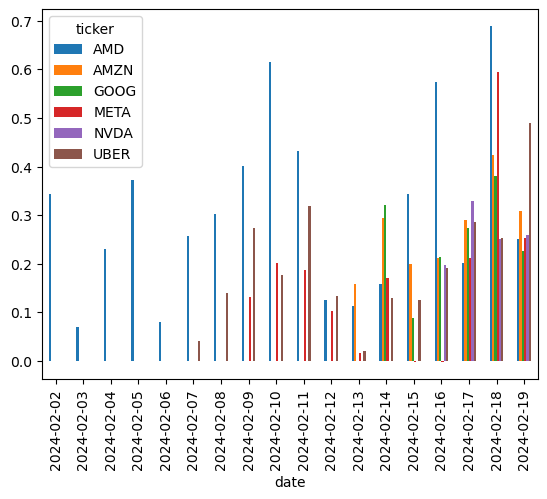

In [142]:
mean_df.plot(kind='bar')
plt.show()